In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [5]:
#y = data_df[y_cols_1+y_cols_2]

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [9]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-06-06 14:25:04.879846: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [11]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [12]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [13]:
mu_neg = np.log(50)
mu_pos = np.log(70000)

# log10 variances
# sigma_neg = 1/3.
# sigma_pos = 1/3.

sigma_neg = 1.0
sigma_pos = 1.0

# mu_neg = 10.
# mu_pos = 3.

# sigma_neg = 1.5
# sigma_pos = 1.5



In [14]:
mu_pos, mu_neg

(11.156250521031495, 3.912023005428146)

In [15]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [55]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [10**(-20),10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

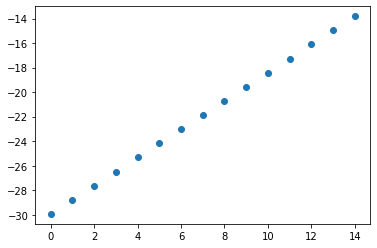

In [17]:
#cs = np.array(cs)*(10**(9))
#cs = np.array(cs)*(10**(3))
#np.log(np.array(cs)+(1e-15))
#cs = np.array(cs)*(10**13)
plt.plot(np.log(cs)[1:],'o')

In [18]:
# cs = np.log(np.array(cs)*(10**13))/10000
np.array(cs)

array([1.00000000e-20, 1.00000000e-13, 3.16227766e-13, 1.00000000e-12,
       3.16227766e-12, 1.00000000e-11, 3.16227766e-11, 1.00000000e-10,
       3.16227766e-10, 1.00000000e-09, 3.16227766e-09, 1.00000000e-08,
       3.16227766e-08, 1.00000000e-07, 3.16227766e-07, 1.00000000e-06])

In [19]:
cs = np.arange(0.1,1,0.06)/1000

In [20]:
cs

array([0.0001 , 0.00016, 0.00022, 0.00028, 0.00034, 0.0004 , 0.00046,
       0.00052, 0.00058, 0.00064, 0.0007 , 0.00076, 0.00082, 0.00088,
       0.00094, 0.001  ])

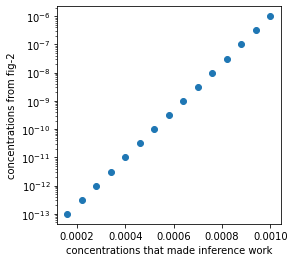

In [62]:

#cs = [0,10**(-6)]

# this numerical range appears to work appears 
#cs = np.arange(0.1,1,0.06)/1000
plt.figure(figsize=(4,4))

for factor in [100]:
    plt.plot(np.arange(0.1,1,0.06)[1:]/1000,cs[1:],'o',label=str(factor))
#plt.plot(np.arange(0.1,1,0.06)/1000,np.log(np.array(cs)+(1e-13)),'o',label=str(factor))
plt.xlabel('concentrations that made inference work')
plt.ylabel('concentrations from fig-2')
plt.yscale('log')
#plt.legend()

In [22]:
cs

array([0.0001 , 0.00016, 0.00022, 0.00028, 0.00034, 0.0004 , 0.00046,
       0.00052, 0.00058, 0.00064, 0.0007 , 0.00076, 0.00082, 0.00088,
       0.00094, 0.001  ])

In [23]:
cs

array([0.0001 , 0.00016, 0.00022, 0.00028, 0.00034, 0.0004 , 0.00046,
       0.00052, 0.00058, 0.00064, 0.0007 , 0.00076, 0.00082, 0.00088,
       0.00094, 0.001  ])

In [24]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[16-1-mp_idx],
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [25]:
#mp_list

In [26]:
# TiteSeq_mp_1 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[0:4],
#                                                          c=0,
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

# TiteSeq_mp_2 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4:8],
#                                                          c=10**(-6),
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

In [27]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [28]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [29]:
#y_train[y_cols_2]

In [30]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 20.1% for validation.
Data shuffled.
Time to set data: 33.5 sec.


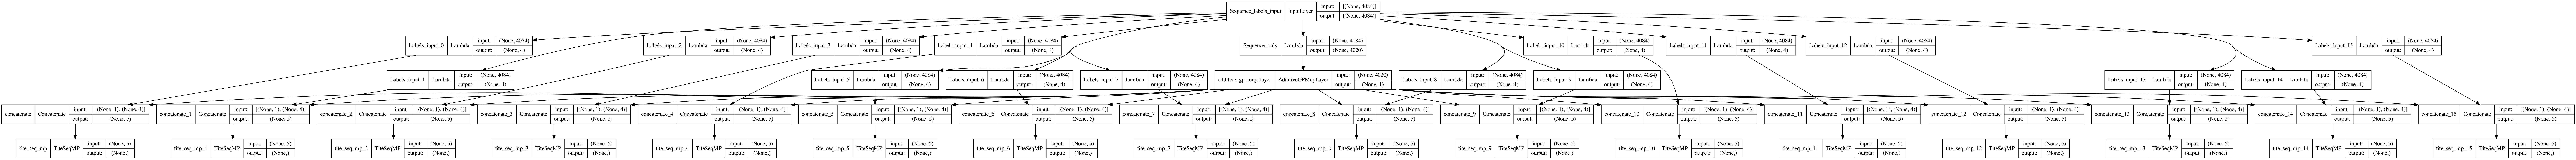

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [32]:

# Fit model to data
model.fit(learning_rate=.0007,
          epochs=200,
          batch_size=300,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/200
442/442 [==============================] - 24s 26ms/step - loss: 6052444.0000 - tite_seq_mp_loss: 566307.7500 - tite_seq_mp_1_loss: 534890.5000 - tite_seq_mp_2_loss: 550256.3750 - tite_seq_mp_3_loss: 810923.8125 - tite_seq_mp_4_loss: 552049.0000 - tite_seq_mp_5_loss: 567884.3125 - tite_seq_mp_6_loss: 618488.2500 - tite_seq_mp_7_loss: 438673.0000 - tite_seq_mp_8_loss: 372171.8750 - tite_seq_mp_9_loss: 236270.1875 - tite_seq_mp_10_loss: 129187.9609 - tite_seq_mp_11_loss: 203841.5625 - tite_seq_mp_12_loss: 124243.0781 - tite_seq_mp_13_loss: 100181.4844 - tite_seq_mp_14_loss: 101619.6562 - tite_seq_mp_15_loss: 145453.2812 - I_var: -3.5474 - val_loss: 6320445.5000 - val_tite_seq_mp_loss: 593916.7500 - val_tite_seq_mp_1_loss: 571119.7500 - val_tite_seq_mp_2_loss: 586978.5625 - val_tite_seq_mp_3_loss: 851409.9375 - val_tite_seq_mp_4_loss: 591029.3125 - val_tite_seq_mp_5_loss: 588464.9375 - val_tite_seq_mp_6_loss: 627687.0000 - val_tite_seq_mp_7_loss: 461230.5000 - val_tite_seq_mp_

442/442 [==============================] - 8s 18ms/step - loss: 5952997.0000 - tite_seq_mp_loss: 561925.9375 - tite_seq_mp_1_loss: 530273.7500 - tite_seq_mp_2_loss: 545347.6250 - tite_seq_mp_3_loss: 805933.7500 - tite_seq_mp_4_loss: 547865.8750 - tite_seq_mp_5_loss: 562908.4375 - tite_seq_mp_6_loss: 614166.1875 - tite_seq_mp_7_loss: 432918.4375 - tite_seq_mp_8_loss: 364369.2812 - tite_seq_mp_9_loss: 224525.9219 - tite_seq_mp_10_loss: 114474.0859 - tite_seq_mp_11_loss: 192677.3750 - tite_seq_mp_12_loss: 118559.1797 - tite_seq_mp_13_loss: 96874.8359 - tite_seq_mp_14_loss: 98323.5156 - tite_seq_mp_15_loss: 141854.6406 - I_var: -3.4050 - val_loss: 6202243.5000 - val_tite_seq_mp_loss: 588943.1875 - val_tite_seq_mp_1_loss: 565902.3750 - val_tite_seq_mp_2_loss: 581249.7500 - val_tite_seq_mp_3_loss: 845542.0625 - val_tite_seq_mp_4_loss: 585973.6250 - val_tite_seq_mp_5_loss: 581463.2500 - val_tite_seq_mp_6_loss: 622438.1875 - val_tite_seq_mp_7_loss: 454505.3438 - val_tite_seq_mp_8_loss: 385598.

442/442 [==============================] - 5s 11ms/step - loss: 4514687.0000 - tite_seq_mp_loss: 488762.7812 - tite_seq_mp_1_loss: 448091.5000 - tite_seq_mp_2_loss: 460043.3750 - tite_seq_mp_3_loss: 525771.6875 - tite_seq_mp_4_loss: 465841.6875 - tite_seq_mp_5_loss: 465784.3438 - tite_seq_mp_6_loss: 529794.6875 - tite_seq_mp_7_loss: 335950.4688 - tite_seq_mp_8_loss: 220417.3594 - tite_seq_mp_9_loss: 112148.9688 - tite_seq_mp_10_loss: 73777.0312 - tite_seq_mp_11_loss: 125073.0000 - tite_seq_mp_12_loss: 73331.1172 - tite_seq_mp_13_loss: 50307.9883 - tite_seq_mp_14_loss: 60223.8398 - tite_seq_mp_15_loss: 79365.7578 - I_var: -1.4620 - val_loss: 4618658.5000 - val_tite_seq_mp_loss: 502317.4375 - val_tite_seq_mp_1_loss: 466704.2188 - val_tite_seq_mp_2_loss: 479148.9062 - val_tite_seq_mp_3_loss: 532178.0625 - val_tite_seq_mp_4_loss: 484579.2188 - val_tite_seq_mp_5_loss: 481130.7812 - val_tite_seq_mp_6_loss: 538180.4375 - val_tite_seq_mp_7_loss: 347199.5000 - val_tite_seq_mp_8_loss: 223263.359

442/442 [==============================] - 4s 10ms/step - loss: 4289946.0000 - tite_seq_mp_loss: 476446.0312 - tite_seq_mp_1_loss: 437801.7812 - tite_seq_mp_2_loss: 448439.8125 - tite_seq_mp_3_loss: 451994.5625 - tite_seq_mp_4_loss: 456995.3750 - tite_seq_mp_5_loss: 449627.3750 - tite_seq_mp_6_loss: 504846.2188 - tite_seq_mp_7_loss: 316349.4062 - tite_seq_mp_8_loss: 196235.9375 - tite_seq_mp_9_loss: 99596.1562 - tite_seq_mp_10_loss: 72374.6406 - tite_seq_mp_11_loss: 123013.0312 - tite_seq_mp_12_loss: 72129.4219 - tite_seq_mp_13_loss: 48116.8203 - tite_seq_mp_14_loss: 58894.8203 - tite_seq_mp_15_loss: 77084.5938 - I_var: -1.4094 - val_loss: 4430044.0000 - val_tite_seq_mp_loss: 489889.2188 - val_tite_seq_mp_1_loss: 455543.9375 - val_tite_seq_mp_2_loss: 467128.9688 - val_tite_seq_mp_3_loss: 466337.6250 - val_tite_seq_mp_4_loss: 475116.0000 - val_tite_seq_mp_5_loss: 469246.7188 - val_tite_seq_mp_6_loss: 520797.7812 - val_tite_seq_mp_7_loss: 331396.3750 - val_tite_seq_mp_8_loss: 201877.8906

442/442 [==============================] - 5s 12ms/step - loss: 4080347.0000 - tite_seq_mp_loss: 472150.8750 - tite_seq_mp_1_loss: 433090.4062 - tite_seq_mp_2_loss: 443694.1562 - tite_seq_mp_3_loss: 301417.2188 - tite_seq_mp_4_loss: 450911.1875 - tite_seq_mp_5_loss: 442287.0625 - tite_seq_mp_6_loss: 497211.3438 - tite_seq_mp_7_loss: 307364.8125 - tite_seq_mp_8_loss: 183820.2500 - tite_seq_mp_9_loss: 88720.6641 - tite_seq_mp_10_loss: 69425.2812 - tite_seq_mp_11_loss: 121677.0156 - tite_seq_mp_12_loss: 73124.2031 - tite_seq_mp_13_loss: 49281.4727 - tite_seq_mp_14_loss: 62758.3633 - tite_seq_mp_15_loss: 83412.5000 - I_var: -1.5976 - val_loss: 4210206.0000 - val_tite_seq_mp_loss: 485512.1562 - val_tite_seq_mp_1_loss: 450911.5312 - val_tite_seq_mp_2_loss: 462464.3750 - val_tite_seq_mp_3_loss: 295584.1875 - val_tite_seq_mp_4_loss: 469155.2188 - val_tite_seq_mp_5_loss: 462824.5938 - val_tite_seq_mp_6_loss: 514367.5312 - val_tite_seq_mp_7_loss: 322978.0938 - val_tite_seq_mp_8_loss: 189343.4844

442/442 [==============================] - 8s 18ms/step - loss: 3589625.7500 - tite_seq_mp_loss: 410964.5625 - tite_seq_mp_1_loss: 320145.1875 - tite_seq_mp_2_loss: 302539.9375 - tite_seq_mp_3_loss: 247183.1094 - tite_seq_mp_4_loss: 402048.5938 - tite_seq_mp_5_loss: 398460.8125 - tite_seq_mp_6_loss: 481758.5938 - tite_seq_mp_7_loss: 298451.0625 - tite_seq_mp_8_loss: 170978.1562 - tite_seq_mp_9_loss: 81584.1406 - tite_seq_mp_10_loss: 68205.6328 - tite_seq_mp_11_loss: 123040.4453 - tite_seq_mp_12_loss: 75698.7812 - tite_seq_mp_13_loss: 51837.6875 - tite_seq_mp_14_loss: 66625.6562 - tite_seq_mp_15_loss: 90102.3516 - I_var: -1.8027 - val_loss: 3335257.0000 - val_tite_seq_mp_loss: 323301.5625 - val_tite_seq_mp_1_loss: 272914.2500 - val_tite_seq_mp_2_loss: 260502.6875 - val_tite_seq_mp_3_loss: 247319.4688 - val_tite_seq_mp_4_loss: 332653.3438 - val_tite_seq_mp_5_loss: 353161.5938 - val_tite_seq_mp_6_loss: 484336.0312 - val_tite_seq_mp_7_loss: 316413.8438 - val_tite_seq_mp_8_loss: 176455.7812

442/442 [==============================] - 9s 21ms/step - loss: 2192333.0000 - tite_seq_mp_loss: 159557.8438 - tite_seq_mp_1_loss: 155138.7188 - tite_seq_mp_2_loss: 161613.7812 - tite_seq_mp_3_loss: 194635.9219 - tite_seq_mp_4_loss: 180648.7031 - tite_seq_mp_5_loss: 193719.2656 - tite_seq_mp_6_loss: 230725.0469 - tite_seq_mp_7_loss: 195262.0000 - tite_seq_mp_8_loss: 138907.0781 - tite_seq_mp_9_loss: 73487.1875 - tite_seq_mp_10_loss: 68086.7500 - tite_seq_mp_11_loss: 127796.5391 - tite_seq_mp_12_loss: 81186.3672 - tite_seq_mp_13_loss: 56842.1680 - tite_seq_mp_14_loss: 73225.2109 - tite_seq_mp_15_loss: 101498.8984 - I_var: -2.1585 - val_loss: 2185879.0000 - val_tite_seq_mp_loss: 151939.7656 - val_tite_seq_mp_1_loss: 147976.6406 - val_tite_seq_mp_2_loss: 158238.3438 - val_tite_seq_mp_3_loss: 191709.1094 - val_tite_seq_mp_4_loss: 174687.5312 - val_tite_seq_mp_5_loss: 197474.2031 - val_tite_seq_mp_6_loss: 234712.4219 - val_tite_seq_mp_7_loss: 201585.6094 - val_tite_seq_mp_8_loss: 141068.328

442/442 [==============================] - 10s 22ms/step - loss: 1793452.0000 - tite_seq_mp_loss: 113513.3125 - tite_seq_mp_1_loss: 110749.5000 - tite_seq_mp_2_loss: 120763.5078 - tite_seq_mp_3_loss: 147711.3906 - tite_seq_mp_4_loss: 130686.1641 - tite_seq_mp_5_loss: 143053.1250 - tite_seq_mp_6_loss: 163895.8594 - tite_seq_mp_7_loss: 147256.1250 - tite_seq_mp_8_loss: 115596.0000 - tite_seq_mp_9_loss: 66229.9375 - tite_seq_mp_10_loss: 68369.1875 - tite_seq_mp_11_loss: 132108.0938 - tite_seq_mp_12_loss: 86086.2188 - tite_seq_mp_13_loss: 61135.4062 - tite_seq_mp_14_loss: 77743.5859 - tite_seq_mp_15_loss: 108550.5469 - I_var: -2.3719 - val_loss: 1805864.1250 - val_tite_seq_mp_loss: 109132.0312 - val_tite_seq_mp_1_loss: 105809.5547 - val_tite_seq_mp_2_loss: 119325.9688 - val_tite_seq_mp_3_loss: 145054.5469 - val_tite_seq_mp_4_loss: 126805.4688 - val_tite_seq_mp_5_loss: 148207.9844 - val_tite_seq_mp_6_loss: 172621.9062 - val_tite_seq_mp_7_loss: 156665.6562 - val_tite_seq_mp_8_loss: 118030.22

442/442 [==============================] - 10s 23ms/step - loss: 1615925.3750 - tite_seq_mp_loss: 95055.8125 - tite_seq_mp_1_loss: 92823.6641 - tite_seq_mp_2_loss: 103460.1406 - tite_seq_mp_3_loss: 123301.9922 - tite_seq_mp_4_loss: 108540.1406 - tite_seq_mp_5_loss: 118951.9531 - tite_seq_mp_6_loss: 136184.4688 - tite_seq_mp_7_loss: 125350.1641 - tite_seq_mp_8_loss: 103579.0391 - tite_seq_mp_9_loss: 62118.2266 - tite_seq_mp_10_loss: 68541.2422 - tite_seq_mp_11_loss: 134412.6562 - tite_seq_mp_12_loss: 88458.3281 - tite_seq_mp_13_loss: 63210.3203 - tite_seq_mp_14_loss: 79791.4531 - tite_seq_mp_15_loss: 112141.2891 - I_var: -2.5136 - val_loss: 1639271.7500 - val_tite_seq_mp_loss: 92575.9688 - val_tite_seq_mp_1_loss: 89708.3359 - val_tite_seq_mp_2_loss: 103536.5312 - val_tite_seq_mp_3_loss: 121644.4141 - val_tite_seq_mp_4_loss: 106406.3906 - val_tite_seq_mp_5_loss: 124572.2031 - val_tite_seq_mp_6_loss: 145291.4688 - val_tite_seq_mp_7_loss: 134593.2500 - val_tite_seq_mp_8_loss: 105937.4531 -

442/442 [==============================] - 9s 20ms/step - loss: 1517364.7500 - tite_seq_mp_loss: 85255.8047 - tite_seq_mp_1_loss: 83309.9609 - tite_seq_mp_2_loss: 94060.6953 - tite_seq_mp_3_loss: 109468.4375 - tite_seq_mp_4_loss: 96360.5312 - tite_seq_mp_5_loss: 105322.5391 - tite_seq_mp_6_loss: 120979.2031 - tite_seq_mp_7_loss: 112696.0625 - tite_seq_mp_8_loss: 96361.0938 - tite_seq_mp_9_loss: 59783.7773 - tite_seq_mp_10_loss: 68715.4141 - tite_seq_mp_11_loss: 135620.0000 - tite_seq_mp_12_loss: 89777.9688 - tite_seq_mp_13_loss: 64454.8984 - tite_seq_mp_14_loss: 80914.3594 - tite_seq_mp_15_loss: 114278.1641 - I_var: -2.5596 - val_loss: 1542913.3750 - val_tite_seq_mp_loss: 83394.3047 - val_tite_seq_mp_1_loss: 80888.1953 - val_tite_seq_mp_2_loss: 94754.4766 - val_tite_seq_mp_3_loss: 108241.7656 - val_tite_seq_mp_4_loss: 94697.3750 - val_tite_seq_mp_5_loss: 111299.1406 - val_tite_seq_mp_6_loss: 130419.4375 - val_tite_seq_mp_7_loss: 121526.9219 - val_tite_seq_mp_8_loss: 98413.3750 - val_ti

442/442 [==============================] - 8s 19ms/step - loss: 1455019.3750 - tite_seq_mp_loss: 79335.6953 - tite_seq_mp_1_loss: 77640.5078 - tite_seq_mp_2_loss: 88397.8906 - tite_seq_mp_3_loss: 101081.2969 - tite_seq_mp_4_loss: 88714.6953 - tite_seq_mp_5_loss: 96702.8203 - tite_seq_mp_6_loss: 111233.4609 - tite_seq_mp_7_loss: 103999.1953 - tite_seq_mp_8_loss: 91285.9531 - tite_seq_mp_9_loss: 58116.3984 - tite_seq_mp_10_loss: 68820.6094 - tite_seq_mp_11_loss: 136257.9062 - tite_seq_mp_12_loss: 90754.4219 - tite_seq_mp_13_loss: 65357.4688 - tite_seq_mp_14_loss: 81790.3516 - tite_seq_mp_15_loss: 115524.0547 - I_var: -2.6033 - val_loss: 1475647.0000 - val_tite_seq_mp_loss: 77146.1094 - val_tite_seq_mp_1_loss: 74751.7344 - val_tite_seq_mp_2_loss: 88781.8203 - val_tite_seq_mp_3_loss: 99225.4297 - val_tite_seq_mp_4_loss: 86572.9453 - val_tite_seq_mp_5_loss: 102243.5078 - val_tite_seq_mp_6_loss: 120491.5469 - val_tite_seq_mp_7_loss: 112722.9141 - val_tite_seq_mp_8_loss: 93003.1016 - val_tite

442/442 [==============================] - 9s 20ms/step - loss: 1407738.2500 - tite_seq_mp_loss: 74747.6641 - tite_seq_mp_1_loss: 73244.6797 - tite_seq_mp_2_loss: 84066.0547 - tite_seq_mp_3_loss: 94555.2344 - tite_seq_mp_4_loss: 82855.8828 - tite_seq_mp_5_loss: 90086.0000 - tite_seq_mp_6_loss: 104092.2578 - tite_seq_mp_7_loss: 97771.4453 - tite_seq_mp_8_loss: 87612.9609 - tite_seq_mp_9_loss: 57017.6836 - tite_seq_mp_10_loss: 68835.1953 - tite_seq_mp_11_loss: 136603.3594 - tite_seq_mp_12_loss: 91337.8438 - tite_seq_mp_13_loss: 65962.9844 - tite_seq_mp_14_loss: 82335.8047 - tite_seq_mp_15_loss: 116606.0703 - I_var: -2.6408 - val_loss: 1440745.3750 - val_tite_seq_mp_loss: 74036.4766 - val_tite_seq_mp_1_loss: 71806.8438 - val_tite_seq_mp_2_loss: 85741.7266 - val_tite_seq_mp_3_loss: 94262.2578 - val_tite_seq_mp_4_loss: 82199.1562 - val_tite_seq_mp_5_loss: 96354.4844 - val_tite_seq_mp_6_loss: 113587.7812 - val_tite_seq_mp_7_loss: 106386.9453 - val_tite_seq_mp_8_loss: 89381.1094 - val_tite_se

442/442 [==============================] - 8s 19ms/step - loss: 1374172.2500 - tite_seq_mp_loss: 71630.1562 - tite_seq_mp_1_loss: 70298.8516 - tite_seq_mp_2_loss: 81148.0391 - tite_seq_mp_3_loss: 90114.7422 - tite_seq_mp_4_loss: 78753.7422 - tite_seq_mp_5_loss: 85315.3984 - tite_seq_mp_6_loss: 98714.9766 - tite_seq_mp_7_loss: 92933.2188 - tite_seq_mp_8_loss: 84509.0547 - tite_seq_mp_9_loss: 56028.2109 - tite_seq_mp_10_loss: 68884.7109 - tite_seq_mp_11_loss: 137099.1406 - tite_seq_mp_12_loss: 91869.6719 - tite_seq_mp_13_loss: 66508.0000 - tite_seq_mp_14_loss: 82862.2891 - tite_seq_mp_15_loss: 117493.3828 - I_var: -2.6642 - val_loss: 1400082.1250 - val_tite_seq_mp_loss: 70460.0312 - val_tite_seq_mp_1_loss: 68237.6484 - val_tite_seq_mp_2_loss: 82465.3359 - val_tite_seq_mp_3_loss: 88968.4844 - val_tite_seq_mp_4_loss: 77342.7734 - val_tite_seq_mp_5_loss: 90957.9609 - val_tite_seq_mp_6_loss: 107691.8672 - val_tite_seq_mp_7_loss: 100961.4375 - val_tite_seq_mp_8_loss: 85949.4844 - val_tite_seq

442/442 [==============================] - 8s 19ms/step - loss: 1350180.3750 - tite_seq_mp_loss: 69257.0547 - tite_seq_mp_1_loss: 68035.5938 - tite_seq_mp_2_loss: 78909.0469 - tite_seq_mp_3_loss: 86708.6562 - tite_seq_mp_4_loss: 75541.3828 - tite_seq_mp_5_loss: 81676.2812 - tite_seq_mp_6_loss: 94766.2500 - tite_seq_mp_7_loss: 89347.4766 - tite_seq_mp_8_loss: 82287.4531 - tite_seq_mp_9_loss: 55548.1211 - tite_seq_mp_10_loss: 69058.1875 - tite_seq_mp_11_loss: 137515.0000 - tite_seq_mp_12_loss: 92469.9531 - tite_seq_mp_13_loss: 67148.3516 - tite_seq_mp_14_loss: 83358.9531 - tite_seq_mp_15_loss: 118542.6328 - I_var: -2.6996 - val_loss: 1379603.2500 - val_tite_seq_mp_loss: 67822.9453 - val_tite_seq_mp_1_loss: 65580.2656 - val_tite_seq_mp_2_loss: 80061.4375 - val_tite_seq_mp_3_loss: 85468.8516 - val_tite_seq_mp_4_loss: 74003.2031 - val_tite_seq_mp_5_loss: 88271.5391 - val_tite_seq_mp_6_loss: 105149.3672 - val_tite_seq_mp_7_loss: 98602.4688 - val_tite_seq_mp_8_loss: 84381.6406 - val_tite_seq_

442/442 [==============================] - 6s 14ms/step - loss: 1329280.7500 - tite_seq_mp_loss: 67275.4609 - tite_seq_mp_1_loss: 66180.4922 - tite_seq_mp_2_loss: 77042.3047 - tite_seq_mp_3_loss: 83882.7266 - tite_seq_mp_4_loss: 72861.3672 - tite_seq_mp_5_loss: 78612.3594 - tite_seq_mp_6_loss: 91248.4375 - tite_seq_mp_7_loss: 86135.6797 - tite_seq_mp_8_loss: 80178.2344 - tite_seq_mp_9_loss: 54974.9023 - tite_seq_mp_10_loss: 69122.4844 - tite_seq_mp_11_loss: 137872.9375 - tite_seq_mp_12_loss: 93060.6484 - tite_seq_mp_13_loss: 67651.0156 - tite_seq_mp_14_loss: 83855.0703 - tite_seq_mp_15_loss: 119315.2656 - I_var: -2.7346 - val_loss: 1351704.7500 - val_tite_seq_mp_loss: 65942.5234 - val_tite_seq_mp_1_loss: 63870.3945 - val_tite_seq_mp_2_loss: 78262.5469 - val_tite_seq_mp_3_loss: 82589.4922 - val_tite_seq_mp_4_loss: 71259.6719 - val_tite_seq_mp_5_loss: 84072.9688 - val_tite_seq_mp_6_loss: 99998.4219 - val_tite_seq_mp_7_loss: 93578.4922 - val_tite_seq_mp_8_loss: 81078.1172 - val_tite_seq_m

442/442 [==============================] - 8s 17ms/step - loss: 1312055.7500 - tite_seq_mp_loss: 65631.6562 - tite_seq_mp_1_loss: 64625.1055 - tite_seq_mp_2_loss: 75529.8359 - tite_seq_mp_3_loss: 81638.5469 - tite_seq_mp_4_loss: 70685.1797 - tite_seq_mp_5_loss: 76080.5391 - tite_seq_mp_6_loss: 88312.2500 - tite_seq_mp_7_loss: 83493.0312 - tite_seq_mp_8_loss: 78293.9453 - tite_seq_mp_9_loss: 54476.2422 - tite_seq_mp_10_loss: 69162.6484 - tite_seq_mp_11_loss: 138156.8750 - tite_seq_mp_12_loss: 93546.2188 - tite_seq_mp_13_loss: 68138.3281 - tite_seq_mp_14_loss: 84304.8203 - tite_seq_mp_15_loss: 119967.4219 - I_var: -2.7311 - val_loss: 1335123.0000 - val_tite_seq_mp_loss: 64608.5117 - val_tite_seq_mp_1_loss: 62718.9453 - val_tite_seq_mp_2_loss: 76889.7500 - val_tite_seq_mp_3_loss: 80540.8672 - val_tite_seq_mp_4_loss: 69447.7422 - val_tite_seq_mp_5_loss: 81247.2031 - val_tite_seq_mp_6_loss: 96591.2812 - val_tite_seq_mp_7_loss: 90406.0703 - val_tite_seq_mp_8_loss: 78910.1875 - val_tite_seq_m

442/442 [==============================] - 8s 17ms/step - loss: 1298506.2500 - tite_seq_mp_loss: 64309.6953 - tite_seq_mp_1_loss: 63419.6641 - tite_seq_mp_2_loss: 74353.0859 - tite_seq_mp_3_loss: 79921.6484 - tite_seq_mp_4_loss: 68939.6172 - tite_seq_mp_5_loss: 74169.5859 - tite_seq_mp_6_loss: 86056.1797 - tite_seq_mp_7_loss: 81312.9062 - tite_seq_mp_8_loss: 76621.9297 - tite_seq_mp_9_loss: 54042.8281 - tite_seq_mp_10_loss: 69233.6875 - tite_seq_mp_11_loss: 138243.1562 - tite_seq_mp_12_loss: 93949.0781 - tite_seq_mp_13_loss: 68645.5234 - tite_seq_mp_14_loss: 84621.1875 - tite_seq_mp_15_loss: 120653.9609 - I_var: -2.7648 - val_loss: 1321472.7500 - val_tite_seq_mp_loss: 63395.9688 - val_tite_seq_mp_1_loss: 61452.7227 - val_tite_seq_mp_2_loss: 75676.2969 - val_tite_seq_mp_3_loss: 78791.3594 - val_tite_seq_mp_4_loss: 67684.0547 - val_tite_seq_mp_5_loss: 79158.7969 - val_tite_seq_mp_6_loss: 94173.9531 - val_tite_seq_mp_7_loss: 88087.2109 - val_tite_seq_mp_8_loss: 77198.6094 - val_tite_seq_m

442/442 [==============================] - 6s 13ms/step - loss: 1287214.8750 - tite_seq_mp_loss: 63165.2773 - tite_seq_mp_1_loss: 62318.8281 - tite_seq_mp_2_loss: 73337.9766 - tite_seq_mp_3_loss: 78383.2188 - tite_seq_mp_4_loss: 67390.8750 - tite_seq_mp_5_loss: 72305.7109 - tite_seq_mp_6_loss: 84228.9922 - tite_seq_mp_7_loss: 79521.5938 - tite_seq_mp_8_loss: 75378.0391 - tite_seq_mp_9_loss: 53803.6211 - tite_seq_mp_10_loss: 69247.3984 - tite_seq_mp_11_loss: 138561.3438 - tite_seq_mp_12_loss: 94375.6797 - tite_seq_mp_13_loss: 68969.0000 - tite_seq_mp_14_loss: 84907.0156 - tite_seq_mp_15_loss: 121305.0469 - I_var: -2.8014 - val_loss: 1313710.1250 - val_tite_seq_mp_loss: 62443.6445 - val_tite_seq_mp_1_loss: 60500.5391 - val_tite_seq_mp_2_loss: 75095.1250 - val_tite_seq_mp_3_loss: 77491.4141 - val_tite_seq_mp_4_loss: 66428.6953 - val_tite_seq_mp_5_loss: 77755.2344 - val_tite_seq_mp_6_loss: 92691.8984 - val_tite_seq_mp_7_loss: 86450.7656 - val_tite_seq_mp_8_loss: 76014.7812 - val_tite_seq_m

442/442 [==============================] - 5s 11ms/step - loss: 1278464.6250 - tite_seq_mp_loss: 62278.3320 - tite_seq_mp_1_loss: 61519.8281 - tite_seq_mp_2_loss: 72616.4688 - tite_seq_mp_3_loss: 77373.9062 - tite_seq_mp_4_loss: 66231.9766 - tite_seq_mp_5_loss: 70929.3438 - tite_seq_mp_6_loss: 82656.3203 - tite_seq_mp_7_loss: 77932.0547 - tite_seq_mp_8_loss: 73998.0547 - tite_seq_mp_9_loss: 53494.2188 - tite_seq_mp_10_loss: 69287.0547 - tite_seq_mp_11_loss: 138760.5156 - tite_seq_mp_12_loss: 94796.5391 - tite_seq_mp_13_loss: 69466.2266 - tite_seq_mp_14_loss: 85280.3906 - tite_seq_mp_15_loss: 121828.5938 - I_var: -2.7894 - val_loss: 1301941.0000 - val_tite_seq_mp_loss: 61693.0781 - val_tite_seq_mp_1_loss: 59885.0039 - val_tite_seq_mp_2_loss: 74290.8281 - val_tite_seq_mp_3_loss: 76436.6484 - val_tite_seq_mp_4_loss: 65309.1641 - val_tite_seq_mp_5_loss: 75731.5625 - val_tite_seq_mp_6_loss: 90147.8828 - val_tite_seq_mp_7_loss: 84194.5781 - val_tite_seq_mp_8_loss: 74306.4297 - val_tite_seq_m

442/442 [==============================] - 5s 12ms/step - loss: 1270772.7500 - tite_seq_mp_loss: 61483.9219 - tite_seq_mp_1_loss: 60804.9141 - tite_seq_mp_2_loss: 71932.8047 - tite_seq_mp_3_loss: 76353.5312 - tite_seq_mp_4_loss: 65150.6953 - tite_seq_mp_5_loss: 69718.2422 - tite_seq_mp_6_loss: 81186.6094 - tite_seq_mp_7_loss: 76712.1875 - tite_seq_mp_8_loss: 73063.3594 - tite_seq_mp_9_loss: 53269.6172 - tite_seq_mp_10_loss: 69328.0000 - tite_seq_mp_11_loss: 139050.1719 - tite_seq_mp_12_loss: 95086.1016 - tite_seq_mp_13_loss: 69769.2188 - tite_seq_mp_14_loss: 85568.1016 - tite_seq_mp_15_loss: 122279.8203 - I_var: -2.8104 - val_loss: 1300055.3750 - val_tite_seq_mp_loss: 61132.3867 - val_tite_seq_mp_1_loss: 59305.1992 - val_tite_seq_mp_2_loss: 73739.8750 - val_tite_seq_mp_3_loss: 75799.0000 - val_tite_seq_mp_4_loss: 64601.3359 - val_tite_seq_mp_5_loss: 75324.2578 - val_tite_seq_mp_6_loss: 89716.8203 - val_tite_seq_mp_7_loss: 83454.9062 - val_tite_seq_mp_8_loss: 73704.4609 - val_tite_seq_m

442/442 [==============================] - 6s 14ms/step - loss: 1264812.2500 - tite_seq_mp_loss: 60844.8281 - tite_seq_mp_1_loss: 60246.1406 - tite_seq_mp_2_loss: 71343.6172 - tite_seq_mp_3_loss: 75626.1094 - tite_seq_mp_4_loss: 64274.9062 - tite_seq_mp_5_loss: 68694.1094 - tite_seq_mp_6_loss: 80105.3359 - tite_seq_mp_7_loss: 75632.6250 - tite_seq_mp_8_loss: 72204.0625 - tite_seq_mp_9_loss: 53185.9648 - tite_seq_mp_10_loss: 69413.6406 - tite_seq_mp_11_loss: 139321.6719 - tite_seq_mp_12_loss: 95396.4453 - tite_seq_mp_13_loss: 70094.7578 - tite_seq_mp_14_loss: 85781.8984 - tite_seq_mp_15_loss: 122628.9688 - I_var: -2.8238 - val_loss: 1289059.0000 - val_tite_seq_mp_loss: 60497.8438 - val_tite_seq_mp_1_loss: 58771.7227 - val_tite_seq_mp_2_loss: 73230.9219 - val_tite_seq_mp_3_loss: 74817.7266 - val_tite_seq_mp_4_loss: 63633.4453 - val_tite_seq_mp_5_loss: 73535.5000 - val_tite_seq_mp_6_loss: 87490.9453 - val_tite_seq_mp_7_loss: 81447.8203 - val_tite_seq_mp_8_loss: 72223.2891 - val_tite_seq_m

442/442 [==============================] - 10s 22ms/step - loss: 1259932.0000 - tite_seq_mp_loss: 60331.3086 - tite_seq_mp_1_loss: 59730.9648 - tite_seq_mp_2_loss: 70909.1562 - tite_seq_mp_3_loss: 75029.6562 - tite_seq_mp_4_loss: 63509.7148 - tite_seq_mp_5_loss: 67863.9844 - tite_seq_mp_6_loss: 79184.3203 - tite_seq_mp_7_loss: 74710.8672 - tite_seq_mp_8_loss: 71371.0781 - tite_seq_mp_9_loss: 53052.7734 - tite_seq_mp_10_loss: 69472.6328 - tite_seq_mp_11_loss: 139374.5625 - tite_seq_mp_12_loss: 95713.8516 - tite_seq_mp_13_loss: 70410.4531 - tite_seq_mp_14_loss: 86074.1797 - tite_seq_mp_15_loss: 123175.3125 - I_var: -2.8170 - val_loss: 1284757.0000 - val_tite_seq_mp_loss: 60298.4414 - val_tite_seq_mp_1_loss: 58724.1758 - val_tite_seq_mp_2_loss: 73071.7031 - val_tite_seq_mp_3_loss: 74575.0938 - val_tite_seq_mp_4_loss: 63317.3477 - val_tite_seq_mp_5_loss: 72394.8438 - val_tite_seq_mp_6_loss: 85885.6719 - val_tite_seq_mp_7_loss: 80074.4531 - val_tite_seq_mp_8_loss: 71234.1094 - val_tite_seq_

442/442 [==============================] - 7s 15ms/step - loss: 1255746.0000 - tite_seq_mp_loss: 59887.0234 - tite_seq_mp_1_loss: 59363.2734 - tite_seq_mp_2_loss: 70554.1719 - tite_seq_mp_3_loss: 74590.4766 - tite_seq_mp_4_loss: 62935.4531 - tite_seq_mp_5_loss: 67159.2266 - tite_seq_mp_6_loss: 78302.4531 - tite_seq_mp_7_loss: 73956.9922 - tite_seq_mp_8_loss: 70644.0938 - tite_seq_mp_9_loss: 52931.2500 - tite_seq_mp_10_loss: 69495.8281 - tite_seq_mp_11_loss: 139480.2188 - tite_seq_mp_12_loss: 95934.3984 - tite_seq_mp_13_loss: 70709.5156 - tite_seq_mp_14_loss: 86299.3672 - tite_seq_mp_15_loss: 123484.0703 - I_var: -2.8441 - val_loss: 1281272.3750 - val_tite_seq_mp_loss: 59688.5469 - val_tite_seq_mp_1_loss: 58007.7031 - val_tite_seq_mp_2_loss: 72658.7422 - val_tite_seq_mp_3_loss: 73881.0938 - val_tite_seq_mp_4_loss: 62518.6133 - val_tite_seq_mp_5_loss: 72032.8359 - val_tite_seq_mp_6_loss: 85548.4297 - val_tite_seq_mp_7_loss: 79614.4219 - val_tite_seq_mp_8_loss: 70735.7578 - val_tite_seq_m

442/442 [==============================] - 7s 16ms/step - loss: 1252001.8750 - tite_seq_mp_loss: 59484.6406 - tite_seq_mp_1_loss: 58988.4961 - tite_seq_mp_2_loss: 70258.6016 - tite_seq_mp_3_loss: 74153.9141 - tite_seq_mp_4_loss: 62341.5117 - tite_seq_mp_5_loss: 66514.8672 - tite_seq_mp_6_loss: 77673.7812 - tite_seq_mp_7_loss: 73334.4453 - tite_seq_mp_8_loss: 70051.9766 - tite_seq_mp_9_loss: 52851.5508 - tite_seq_mp_10_loss: 69507.8203 - tite_seq_mp_11_loss: 139577.8750 - tite_seq_mp_12_loss: 96146.4219 - tite_seq_mp_13_loss: 70883.0078 - tite_seq_mp_14_loss: 86438.9062 - tite_seq_mp_15_loss: 123774.6094 - I_var: -2.8639 - val_loss: 1275757.6250 - val_tite_seq_mp_loss: 59495.8047 - val_tite_seq_mp_1_loss: 57907.0742 - val_tite_seq_mp_2_loss: 72397.4219 - val_tite_seq_mp_3_loss: 73531.7812 - val_tite_seq_mp_4_loss: 62115.2734 - val_tite_seq_mp_5_loss: 70892.8047 - val_tite_seq_mp_6_loss: 84045.0234 - val_tite_seq_mp_7_loss: 78255.1875 - val_tite_seq_mp_8_loss: 69717.8281 - val_tite_seq_m

442/442 [==============================] - 10s 23ms/step - loss: 1249006.0000 - tite_seq_mp_loss: 59144.4453 - tite_seq_mp_1_loss: 58698.4883 - tite_seq_mp_2_loss: 69999.1328 - tite_seq_mp_3_loss: 73905.6406 - tite_seq_mp_4_loss: 61879.5703 - tite_seq_mp_5_loss: 65995.9141 - tite_seq_mp_6_loss: 77024.9609 - tite_seq_mp_7_loss: 72722.5625 - tite_seq_mp_8_loss: 69437.9062 - tite_seq_mp_9_loss: 52747.8789 - tite_seq_mp_10_loss: 69559.5156 - tite_seq_mp_11_loss: 139784.8750 - tite_seq_mp_12_loss: 96339.1250 - tite_seq_mp_13_loss: 71089.6953 - tite_seq_mp_14_loss: 86608.7422 - tite_seq_mp_15_loss: 124047.2656 - I_var: -2.8728 - val_loss: 1273368.0000 - val_tite_seq_mp_loss: 59179.7539 - val_tite_seq_mp_1_loss: 57575.1953 - val_tite_seq_mp_2_loss: 72245.6797 - val_tite_seq_mp_3_loss: 73184.2734 - val_tite_seq_mp_4_loss: 61645.1602 - val_tite_seq_mp_5_loss: 70458.8750 - val_tite_seq_mp_6_loss: 83525.9531 - val_tite_seq_mp_7_loss: 77656.2891 - val_tite_seq_mp_8_loss: 69167.8750 - val_tite_seq_

442/442 [==============================] - 9s 21ms/step - loss: 1246836.8750 - tite_seq_mp_loss: 58951.4688 - tite_seq_mp_1_loss: 58553.1992 - tite_seq_mp_2_loss: 69824.2578 - tite_seq_mp_3_loss: 73679.1719 - tite_seq_mp_4_loss: 61587.6641 - tite_seq_mp_5_loss: 65582.5469 - tite_seq_mp_6_loss: 76433.1641 - tite_seq_mp_7_loss: 72273.5000 - tite_seq_mp_8_loss: 69021.1953 - tite_seq_mp_9_loss: 52739.7422 - tite_seq_mp_10_loss: 69551.2188 - tite_seq_mp_11_loss: 139919.8125 - tite_seq_mp_12_loss: 96530.5391 - tite_seq_mp_13_loss: 71211.3594 - tite_seq_mp_14_loss: 86706.5078 - tite_seq_mp_15_loss: 124250.9844 - I_var: -2.8839 - val_loss: 1271562.1250 - val_tite_seq_mp_loss: 58977.9453 - val_tite_seq_mp_1_loss: 57392.5938 - val_tite_seq_mp_2_loss: 72234.6484 - val_tite_seq_mp_3_loss: 72987.6719 - val_tite_seq_mp_4_loss: 61327.1055 - val_tite_seq_mp_5_loss: 70011.9844 - val_tite_seq_mp_6_loss: 83070.3516 - val_tite_seq_mp_7_loss: 77180.3828 - val_tite_seq_mp_8_loss: 68789.2500 - val_tite_seq_m

442/442 [==============================] - 9s 20ms/step - loss: 1245674.6250 - tite_seq_mp_loss: 58748.1953 - tite_seq_mp_1_loss: 58366.3086 - tite_seq_mp_2_loss: 69690.3438 - tite_seq_mp_3_loss: 73504.7578 - tite_seq_mp_4_loss: 61271.5625 - tite_seq_mp_5_loss: 65283.7305 - tite_seq_mp_6_loss: 76280.9531 - tite_seq_mp_7_loss: 71948.4531 - tite_seq_mp_8_loss: 68612.2109 - tite_seq_mp_9_loss: 52707.2500 - tite_seq_mp_10_loss: 69615.0781 - tite_seq_mp_11_loss: 140071.4844 - tite_seq_mp_12_loss: 96721.1875 - tite_seq_mp_13_loss: 71433.1016 - tite_seq_mp_14_loss: 86904.0000 - tite_seq_mp_15_loss: 124495.6719 - I_var: -2.8958 - val_loss: 1269041.8750 - val_tite_seq_mp_loss: 58871.2891 - val_tite_seq_mp_1_loss: 57313.8555 - val_tite_seq_mp_2_loss: 71930.7656 - val_tite_seq_mp_3_loss: 72907.7031 - val_tite_seq_mp_4_loss: 61133.9453 - val_tite_seq_mp_5_loss: 69506.0391 - val_tite_seq_mp_6_loss: 82263.8750 - val_tite_seq_mp_7_loss: 76663.5234 - val_tite_seq_mp_8_loss: 68203.5781 - val_tite_seq_m

442/442 [==============================] - 8s 18ms/step - loss: 1243833.0000 - tite_seq_mp_loss: 58599.9727 - tite_seq_mp_1_loss: 58228.2031 - tite_seq_mp_2_loss: 69546.3281 - tite_seq_mp_3_loss: 73425.9141 - tite_seq_mp_4_loss: 61041.8672 - tite_seq_mp_5_loss: 64923.0352 - tite_seq_mp_6_loss: 75667.9453 - tite_seq_mp_7_loss: 71540.5391 - tite_seq_mp_8_loss: 68176.5547 - tite_seq_mp_9_loss: 52664.1367 - tite_seq_mp_10_loss: 69568.1875 - tite_seq_mp_11_loss: 140037.7812 - tite_seq_mp_12_loss: 96914.0781 - tite_seq_mp_13_loss: 71648.3828 - tite_seq_mp_14_loss: 87036.8750 - tite_seq_mp_15_loss: 124792.6328 - I_var: -2.8795 - val_loss: 1272213.5000 - val_tite_seq_mp_loss: 58759.4492 - val_tite_seq_mp_1_loss: 57137.3945 - val_tite_seq_mp_2_loss: 72114.5000 - val_tite_seq_mp_3_loss: 72839.6094 - val_tite_seq_mp_4_loss: 60952.0898 - val_tite_seq_mp_5_loss: 69797.1094 - val_tite_seq_mp_6_loss: 82759.7656 - val_tite_seq_mp_7_loss: 76810.3281 - val_tite_seq_mp_8_loss: 68241.0938 - val_tite_seq_m

442/442 [==============================] - 7s 15ms/step - loss: 1242174.2500 - tite_seq_mp_loss: 58379.9648 - tite_seq_mp_1_loss: 58059.3594 - tite_seq_mp_2_loss: 69374.7812 - tite_seq_mp_3_loss: 73211.4453 - tite_seq_mp_4_loss: 60724.8438 - tite_seq_mp_5_loss: 64597.0586 - tite_seq_mp_6_loss: 75444.4062 - tite_seq_mp_7_loss: 71198.9453 - tite_seq_mp_8_loss: 67844.3125 - tite_seq_mp_9_loss: 52623.6836 - tite_seq_mp_10_loss: 69671.8828 - tite_seq_mp_11_loss: 140321.9375 - tite_seq_mp_12_loss: 97005.9688 - tite_seq_mp_13_loss: 71781.1641 - tite_seq_mp_14_loss: 87106.0312 - tite_seq_mp_15_loss: 124806.2734 - I_var: -2.8948 - val_loss: 1266561.8750 - val_tite_seq_mp_loss: 58739.8906 - val_tite_seq_mp_1_loss: 57196.5195 - val_tite_seq_mp_2_loss: 71828.6719 - val_tite_seq_mp_3_loss: 72744.5156 - val_tite_seq_mp_4_loss: 60805.3555 - val_tite_seq_mp_5_loss: 68706.0391 - val_tite_seq_mp_6_loss: 81224.6484 - val_tite_seq_mp_7_loss: 75767.2109 - val_tite_seq_mp_8_loss: 67414.7109 - val_tite_seq_m

442/442 [==============================] - 6s 13ms/step - loss: 1241387.2500 - tite_seq_mp_loss: 58230.7383 - tite_seq_mp_1_loss: 57908.7109 - tite_seq_mp_2_loss: 69321.7266 - tite_seq_mp_3_loss: 73162.7500 - tite_seq_mp_4_loss: 60501.6602 - tite_seq_mp_5_loss: 64421.8008 - tite_seq_mp_6_loss: 75070.0156 - tite_seq_mp_7_loss: 70968.5938 - tite_seq_mp_8_loss: 67567.7188 - tite_seq_mp_9_loss: 52639.3477 - tite_seq_mp_10_loss: 69725.2891 - tite_seq_mp_11_loss: 140374.1875 - tite_seq_mp_12_loss: 97149.2578 - tite_seq_mp_13_loss: 71923.4141 - tite_seq_mp_14_loss: 87262.0703 - tite_seq_mp_15_loss: 125137.6719 - I_var: -2.9133 - val_loss: 1265717.2500 - val_tite_seq_mp_loss: 58503.5859 - val_tite_seq_mp_1_loss: 56976.3398 - val_tite_seq_mp_2_loss: 71672.2500 - val_tite_seq_mp_3_loss: 72580.2344 - val_tite_seq_mp_4_loss: 60543.2656 - val_tite_seq_mp_5_loss: 68593.8984 - val_tite_seq_mp_6_loss: 81218.0703 - val_tite_seq_mp_7_loss: 75534.9141 - val_tite_seq_mp_8_loss: 67131.1484 - val_tite_seq_m

442/442 [==============================] - 6s 13ms/step - loss: 1239779.6250 - tite_seq_mp_loss: 58127.1055 - tite_seq_mp_1_loss: 57783.4648 - tite_seq_mp_2_loss: 69190.1406 - tite_seq_mp_3_loss: 73044.7812 - tite_seq_mp_4_loss: 60292.8945 - tite_seq_mp_5_loss: 64154.5938 - tite_seq_mp_6_loss: 74810.0000 - tite_seq_mp_7_loss: 70704.1484 - tite_seq_mp_8_loss: 67298.6953 - tite_seq_mp_9_loss: 52575.0156 - tite_seq_mp_10_loss: 69711.1641 - tite_seq_mp_11_loss: 140420.1406 - tite_seq_mp_12_loss: 97164.8828 - tite_seq_mp_13_loss: 71989.5547 - tite_seq_mp_14_loss: 87265.3594 - tite_seq_mp_15_loss: 125225.1797 - I_var: -2.9078 - val_loss: 1264449.0000 - val_tite_seq_mp_loss: 58534.9922 - val_tite_seq_mp_1_loss: 57071.2227 - val_tite_seq_mp_2_loss: 71674.6250 - val_tite_seq_mp_3_loss: 72589.0469 - val_tite_seq_mp_4_loss: 60468.1719 - val_tite_seq_mp_5_loss: 68138.4453 - val_tite_seq_mp_6_loss: 80518.0156 - val_tite_seq_mp_7_loss: 75145.6016 - val_tite_seq_mp_8_loss: 66828.5781 - val_tite_seq_m

442/442 [==============================] - 7s 15ms/step - loss: 1238946.2500 - tite_seq_mp_loss: 57975.7148 - tite_seq_mp_1_loss: 57699.6758 - tite_seq_mp_2_loss: 69110.5625 - tite_seq_mp_3_loss: 72952.9219 - tite_seq_mp_4_loss: 60111.6758 - tite_seq_mp_5_loss: 63956.0195 - tite_seq_mp_6_loss: 74658.5625 - tite_seq_mp_7_loss: 70465.4062 - tite_seq_mp_8_loss: 67035.5000 - tite_seq_mp_9_loss: 52575.4805 - tite_seq_mp_10_loss: 69694.0547 - tite_seq_mp_11_loss: 140485.7188 - tite_seq_mp_12_loss: 97359.0859 - tite_seq_mp_13_loss: 72103.2656 - tite_seq_mp_14_loss: 87377.6406 - tite_seq_mp_15_loss: 125361.2031 - I_var: -2.8929 - val_loss: 1263669.0000 - val_tite_seq_mp_loss: 58544.2031 - val_tite_seq_mp_1_loss: 57022.6836 - val_tite_seq_mp_2_loss: 71685.7422 - val_tite_seq_mp_3_loss: 72549.4297 - val_tite_seq_mp_4_loss: 60362.5000 - val_tite_seq_mp_5_loss: 67902.4766 - val_tite_seq_mp_6_loss: 80141.4844 - val_tite_seq_mp_7_loss: 74785.3672 - val_tite_seq_mp_8_loss: 66561.3516 - val_tite_seq_m

442/442 [==============================] - 9s 19ms/step - loss: 1238854.6250 - tite_seq_mp_loss: 57915.2656 - tite_seq_mp_1_loss: 57656.3398 - tite_seq_mp_2_loss: 69094.8672 - tite_seq_mp_3_loss: 72966.0078 - tite_seq_mp_4_loss: 60042.8867 - tite_seq_mp_5_loss: 63888.1992 - tite_seq_mp_6_loss: 74456.2422 - tite_seq_mp_7_loss: 70334.4297 - tite_seq_mp_8_loss: 66824.9844 - tite_seq_mp_9_loss: 52567.2188 - tite_seq_mp_10_loss: 69821.3672 - tite_seq_mp_11_loss: 140611.4688 - tite_seq_mp_12_loss: 97407.6641 - tite_seq_mp_13_loss: 72235.9766 - tite_seq_mp_14_loss: 87509.2266 - tite_seq_mp_15_loss: 125498.7578 - I_var: -2.9125 - val_loss: 1262666.2500 - val_tite_seq_mp_loss: 58332.5664 - val_tite_seq_mp_1_loss: 56840.9492 - val_tite_seq_mp_2_loss: 71657.8203 - val_tite_seq_mp_3_loss: 72394.6250 - val_tite_seq_mp_4_loss: 60164.1953 - val_tite_seq_mp_5_loss: 67843.4531 - val_tite_seq_mp_6_loss: 80030.9766 - val_tite_seq_mp_7_loss: 74638.7969 - val_tite_seq_mp_8_loss: 66422.7422 - val_tite_seq_m

442/442 [==============================] - 8s 17ms/step - loss: 1237697.0000 - tite_seq_mp_loss: 57855.8555 - tite_seq_mp_1_loss: 57611.2969 - tite_seq_mp_2_loss: 69047.1797 - tite_seq_mp_3_loss: 72897.6328 - tite_seq_mp_4_loss: 59928.3906 - tite_seq_mp_5_loss: 63625.8438 - tite_seq_mp_6_loss: 74174.2344 - tite_seq_mp_7_loss: 70101.0859 - tite_seq_mp_8_loss: 66565.9141 - tite_seq_mp_9_loss: 52529.9336 - tite_seq_mp_10_loss: 69807.5859 - tite_seq_mp_11_loss: 140587.0000 - tite_seq_mp_12_loss: 97545.9375 - tite_seq_mp_13_loss: 72277.3828 - tite_seq_mp_14_loss: 87536.5781 - tite_seq_mp_15_loss: 125580.4766 - I_var: -2.9272 - val_loss: 1263461.3750 - val_tite_seq_mp_loss: 58243.3008 - val_tite_seq_mp_1_loss: 56736.6562 - val_tite_seq_mp_2_loss: 71761.7031 - val_tite_seq_mp_3_loss: 72406.0156 - val_tite_seq_mp_4_loss: 60045.8633 - val_tite_seq_mp_5_loss: 67918.0859 - val_tite_seq_mp_6_loss: 80144.6875 - val_tite_seq_mp_7_loss: 74534.5938 - val_tite_seq_mp_8_loss: 66372.6875 - val_tite_seq_m

On test data:


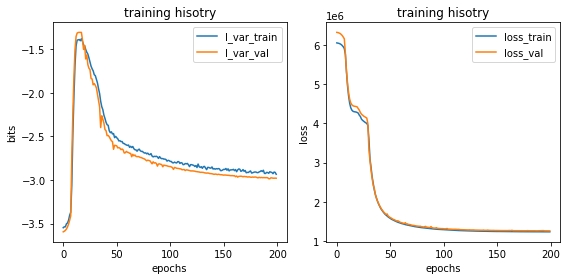

In [33]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [34]:
model.history['loss'][-1]/1e6

1.237674875

In [35]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [36]:
theta

array([[-0.18047363, -1.0910534 , -0.4582414 , ..., -0.7475972 ,
        -0.9313026 , -0.7551829 ],
       [-0.42902642, -0.5902097 , -0.32450822, ..., -0.34076074,
        -0.6578254 , -0.5375138 ],
       [-0.52447116, -1.1136985 , -0.47908938, ..., -0.649032  ,
        -0.7193709 , -0.4865898 ],
       ...,
       [-0.15535426, -0.2960545 , -0.59082144, ..., -0.28265026,
        -0.3936304 , -0.38016924],
       [-0.56998754, -0.38944343, -0.6462345 , ..., -0.26898208,
        -0.45146072, -0.56464654],
       [ 0.2722822 ,  0.22966851,  0.10364093, ..., -0.22533993,
         0.21795413,  0.31795233]], dtype=float32)

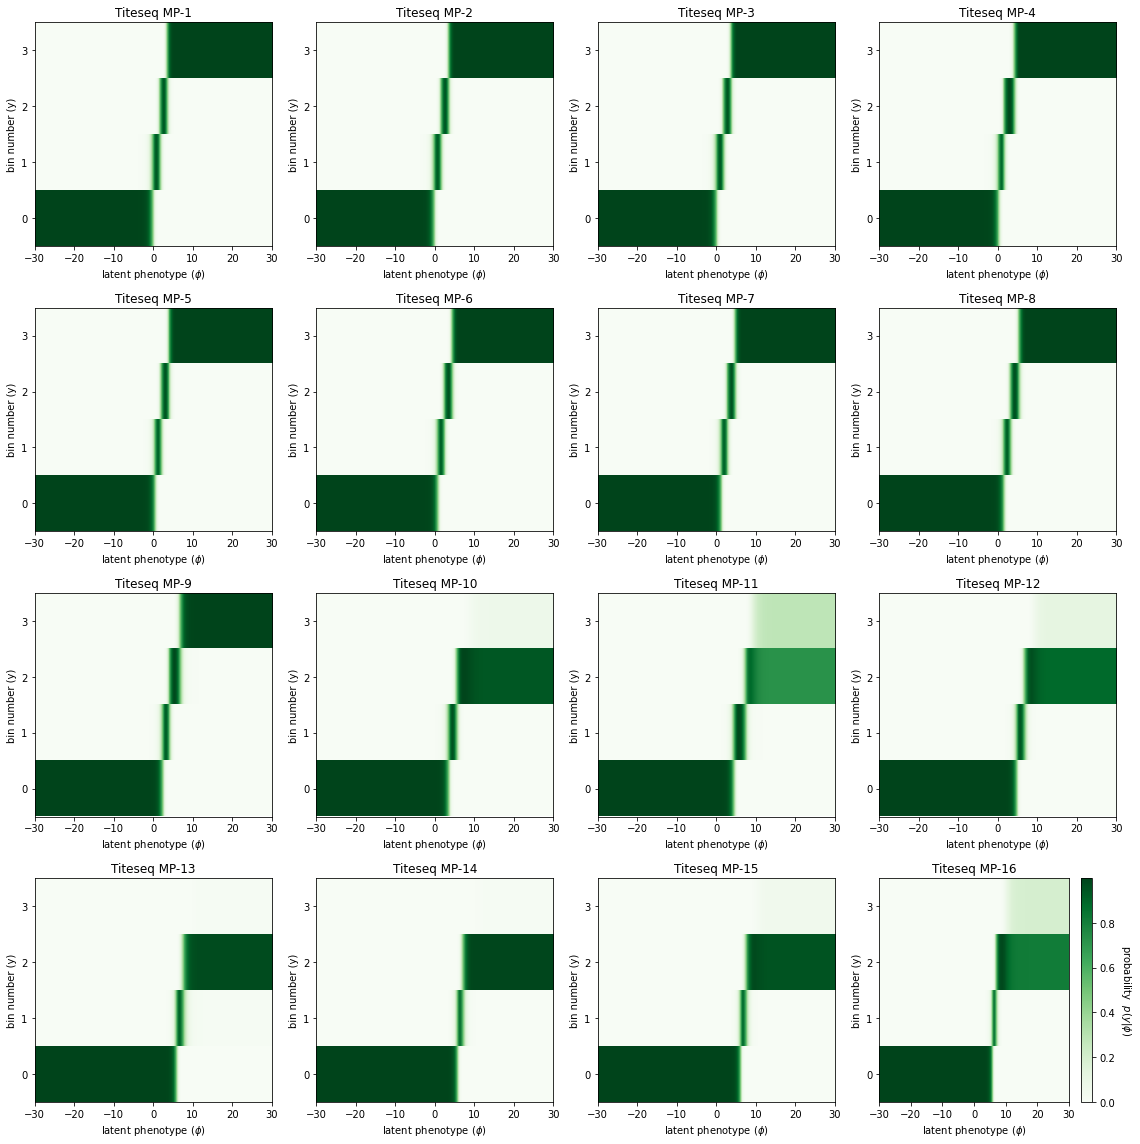

In [37]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-30, 30]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig('ace2rbd_Titeseq_measurment_prcoess.png',dpi=300,bbox_inches='tight')


In [38]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [39]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [40]:
theta_df = pd.DataFrame(theta,columns=alphabet)

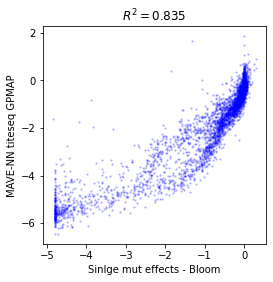

In [41]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [42]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

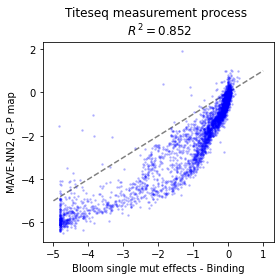

In [54]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

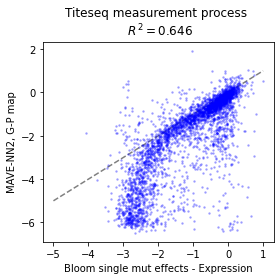

In [44]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

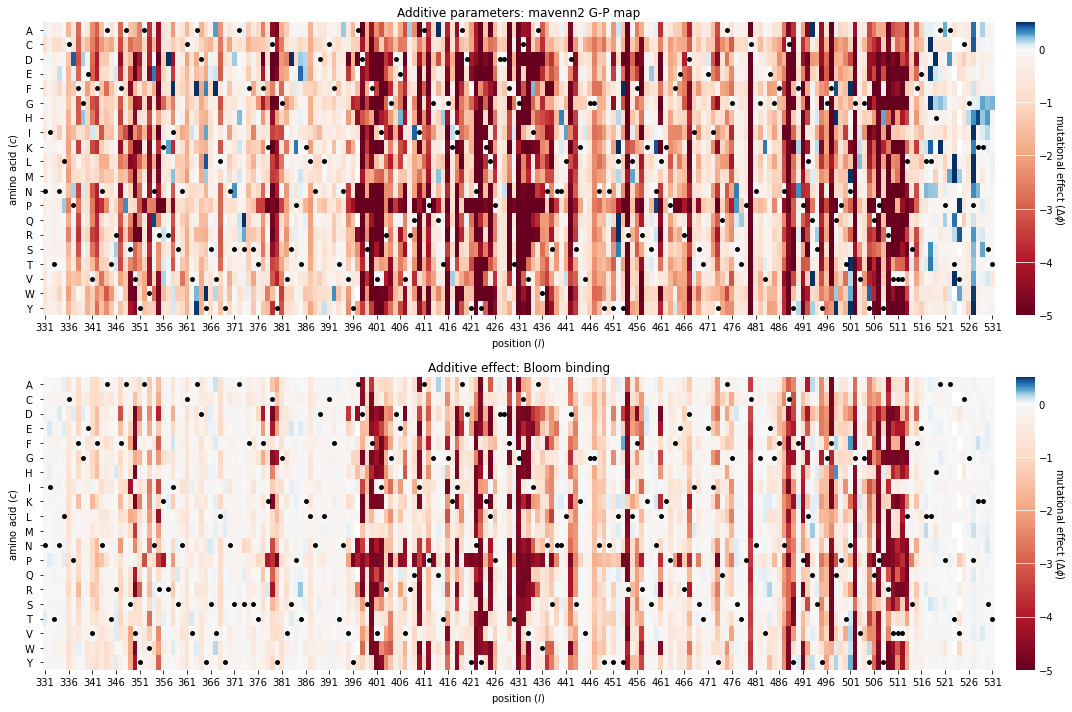

In [45]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [48]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')

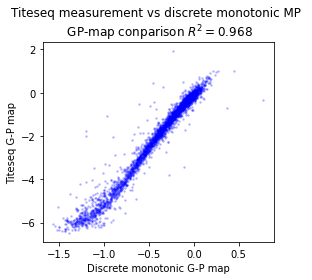

In [53]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Discrete monotonic G-P map')
plt.title(f'Titeseq measurement vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
plt.ylabel('Titeseq G-P map')
plt.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_binding_comparison.png',dpi=200,bbox_inches='tight')